In [1]:
import torch
import numpy as np
import shutil
import matplotlib.pyplot as plt
from torchsummary import summary
import cv2
from PIL import Image
from bs4 import BeautifulSoup
import xml
import pandas as pd
from random import randint, sample
from image_processing import Processing
import json
from helper import *
from custom_utils import *
from nets import *
from xray_detection import XRayDetection
from constants import *
from augmentation import *

import os

%matplotlib inline

device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [4]:
img = cv2.imread('../data/single_tooth_disease/images/72.jpg')

cv2.imwrite('../../../Pictures/example.jpg', Processing.process_image(img, (150, 100)))

True

In [8]:
blur_image(img, (20, 10), '../../../Pictures/example_blured.jpg')

array([[[103, 103, 103],
        [103, 103, 103],
        [103, 103, 103],
        ...,
        [175, 175, 175],
        [175, 175, 175],
        [175, 175, 175]],

       [[103, 103, 103],
        [103, 103, 103],
        [103, 103, 103],
        ...,
        [175, 175, 175],
        [175, 175, 175],
        [175, 175, 175]],

       [[103, 103, 103],
        [103, 103, 103],
        [103, 103, 103],
        ...,
        [175, 175, 175],
        [175, 175, 175],
        [175, 175, 175]],

       ...,

       [[143, 143, 143],
        [143, 143, 143],
        [143, 143, 143],
        ...,
        [116, 116, 116],
        [116, 116, 116],
        [116, 116, 116]],

       [[143, 143, 143],
        [143, 143, 143],
        [143, 143, 143],
        ...,
        [116, 116, 116],
        [116, 116, 116],
        [116, 116, 116]],

       [[143, 143, 143],
        [143, 143, 143],
        [143, 143, 143],
        ...,
        [116, 116, 116],
        [116, 116, 116],
        [116, 116, 116]]

In [2]:
i = 800

label_path = f'../data/single_tooth_disease/labels.csv'

(270, 307, 3)


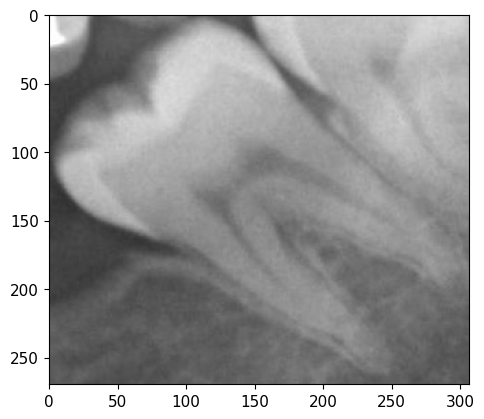

In [13]:
img = cv2.imread('../data/single_tooth_disease/images/1106.jpg')
print(img.shape)
plt.imshow(img)

In [14]:
cv2.imwrite('../../../Pictures/layn.jpg', cv2.cvtColor(Processing.process_image(img, (150, 100)), cv2.COLOR_GRAY2BGR))

True

In [2]:
label_path = f'../data/single_tooth_disease/test_labels.csv'

In [3]:
i = 2000

(379, 118, 3)


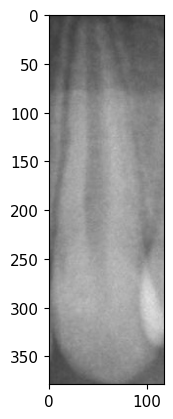

In [146]:

x = input()
if x:
    shutil.copy(f'../data/single_tooth/images/{i}.jpg', f'../data/single_tooth_disease/test_images/{i}.jpg')
    with open(label_path, 'a') as file:
        file.write(f'\n{i}.jpg,{x[0]},{x[1]},{x[2]},{x[3]},{x[4]}')

i += 1

image = cv2.imread(f'../data/single_tooth/images/{i}.jpg')

plt.imshow(image)
print(image.shape)

In [4]:
create_all_single_images()

KeyboardInterrupt: 

In [16]:
img_path = '../results/full_teeth1/'

start = 231
end = 478

images = []

for i in range(start, end + 1):
    image = cv2.imread(img_path + f'{i}.jpg')
    
    image = cv2.putText(image, f'{i}.png', (100, 100), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
    images.append(image)

images_to_pdf(images, f'../data/full_teeth/detected')


In [4]:
img_path = '../data/full_teeth/images/'
xml_path = '../data/full_teeth/xmls/'

start = 211
end = 230

if not os.path.exists('../data/full_teeth/checked'):
    os.mkdir('../data/full_teeth/checked')

for i in range(1, end + 1):
    is_exists, w, h, objs = get_xml_info(xml_path + f'{i}.xml')
    if not is_exists:
        continue
    image = cv2.imread(img_path + f'{i}.jpg')
    for obj in objs:
        class_name, xmin, ymin, xmax, ymax = get_bndbox_info(obj)
        image = draw_bndbox_on_image(image, class_name, (xmin, ymin), (xmax, ymax))
    
    image = cv2.putText(image, f'{i}.png', (100, 100), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
    cv2.imwrite(f'../data/full_teeth/checked/{i}.jpg', image)

images_to_pdf([f'../data/full_teeth/checked/{i}.jpg' for i in range(start, end + 1)], f'../data/full_teeth/{start}-{end}')


In [ ]:
images_to_pdf([f'../results/full_teeth1/{i}.jpg' for i in range(start, end + 1)], f'../data/full_teeth/{start}-{end}')

In [17]:
with open('../data/single_tooth_disease/labels.csv', 'r') as file:
    rows = file.readlines()[1:]

images = [[], [], [], [], []]

names = ['caries', 'filling', 'cover', 'implant', 'removed nerve']

for row in rows:
    row = row.replace('\n', '').split(',')

    img = cv2.imread(f'../data/single_tooth_disease/images/{row[0]}')
    for i in range(5):
        image = cv2.putText(img.copy(), f'{row[0]} {"no " if row[i+1] == "0" else ""}{names[i]}', (15, 15), cv2.FONT_HERSHEY_COMPLEX, 0.3, (0, 0, 255), 1)
        images[i].append(image)

for i in range(5):
    images_to_pdf(images[i], f'../data/single_tooth_disease/{names[i]}')


In [16]:
def create_xmls_from_label(image_path, label_path, xmls_path):
    file_name = image_path.split('/')[-1].split('.')[0]

    height, width, _ = cv2.imread(image_path).shape

    file = '<annotation>\n\t<folder>images</folder>\n\t'
    file += f'<filename>{file_name}.jpg</filename>\n\t'
    file += f'<path>{image_path}</path>\n\t'
    file += '<source>\n\t\t<database>Unknown</database>\n\t</source>\n\t'
    file += f'<size>\n\t\t<width>{width}</width>\n\t\t'
    file += f'<height>{height}</height>\n\t\t<depth>1</depth>\n\t</size>\n\t'
    file += '<segmented>0</segmented>\n'

    classes = get_tooth_classes_reverse()
    
    def get_object_xml(class_name, x_center, y_center, w, h, prob):
        xmin = x_center - w/2
        xmax = xmin + w
        ymin = y_center - h/2
        ymax = ymin + h
        text = f'\t<object>\n\t\t<name>{classes[class_name]}</name>\n\t\t<pose>Unspecified</pose>' + \
                '\n\t\t<truncated>0</truncated>\n\t\t<difficult>0</difficult>\n\t\t' + \
                '<bndbox>\n\t\t\t' + \
                f'<xmin>{int(xmin * width)}</xmin>\n\t\t\t<ymin>{int(ymin * height)}</ymin>\n\t\t\t' + \
                f'<xmax>{int(xmax * width)}</xmax>\n\t\t\t<ymax>{int(ymax * height)}</ymax>\n\t\t</bndbox>' + \
                '\n\t</object>\n'
        return text


    with open(label_path, 'r') as label_file:
        rows = label_file.readlines()

    for row in rows:
        file += get_object_xml(int(row.split()[0]), *[float(x) for x in row.split()[1:]])
    
    file += '</annotation>'
    
    with open(os.path.join(xmls_path, f'{file_name}.xml'), 'w') as xml_file:
        xml_file.write(file)
    

In [17]:
for x in os.listdir('../test/labels/'):
    create_xmls_from_label(
        f'../data/full_teeth/images/{x.split(".")[0]}.jpg',
        '../test/labels/' + x,
        '../test/xmls/'
    )

In [ ]:
train_images, train_pos, train_labels, train_images, test_pos, train_labels = load_single_tooth_data()

In [2]:
a, *_ = load_single_tooth_data_2(image_shape=(200, 500))

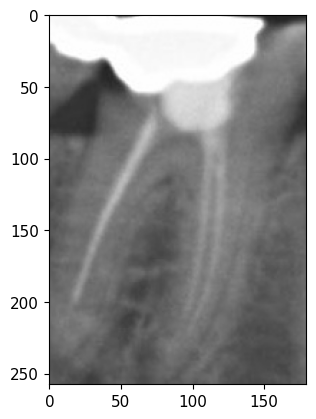

In [13]:
plt.imshow(cv2.imread('../data/single_tooth/images/351.jpg'))

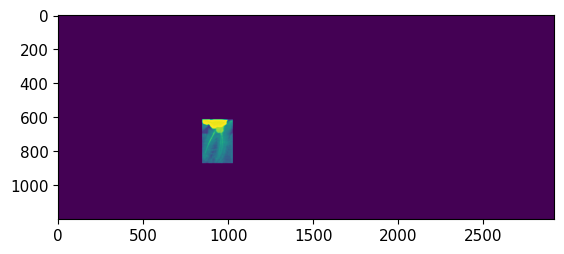

In [15]:
%matplotlib inline

cv2.imwrite('../../../Pictures/stn2.jpg', a[350])
plt.imshow(a[350])
plt.show();

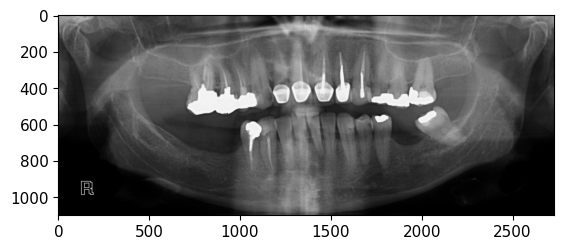

In [2]:
%matplotlib inline

img = cv2.imread('../data/full_teeth/images/11.jpg')

plt.imshow(img)

plt.show()

In [37]:
(img == cv2.blur(img, (5, 50))).sum() / (img.shape[0] * img.shape[1] * 3)


0.1731238761238761

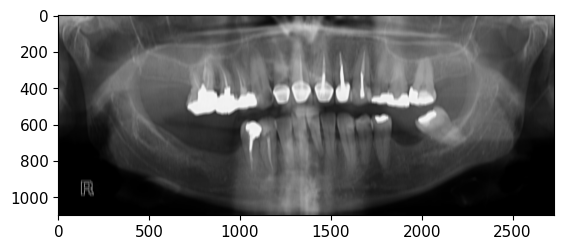

In [42]:
plt.imshow(cv2.blur(img, (1, 20)))

In [26]:
img.shape, cv2.blur(img, (1, 25)).shape

((1250, 2850, 3), (1250, 2850, 3))

In [2]:
xrd = XRayDetection('../data/full_teeth/images/1.jpg')

In [3]:
image = xrd.run()

YOLOv5 🚀 v7.0-80-gc3c8e71 Python-3.10.6 torch-1.13.1+cu116 CUDA:0 (NVIDIA GeForce RTX 3070 Ti Laptop GPU, 7982MiB)

Fusing layers... 
Model summary: 212 layers, 20852934 parameters, 0 gradients, 47.9 GFLOPs
image 1/1 /home/sepuh/workspace/diploma/media/images/teeth/1_2.jpg: 288x640 27 items, 9.8ms
Speed: 0.4ms pre-process, 9.8ms inference, 1.1ms NMS per image at shape (1, 3, 640, 640)
Results saved to /home/sepuh/workspace/diploma/results/full_teeth
12 labels saved to /home/sepuh/workspace/diploma/results/full_teeth/labels


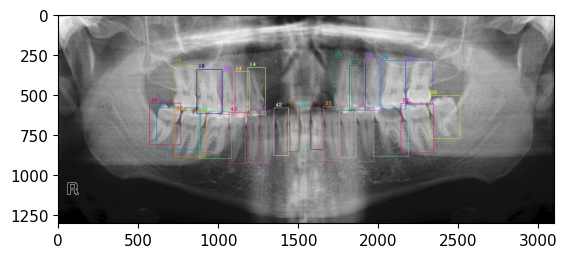

In [4]:
plt.imshow(image)
plt.show()

In [16]:
i = 1

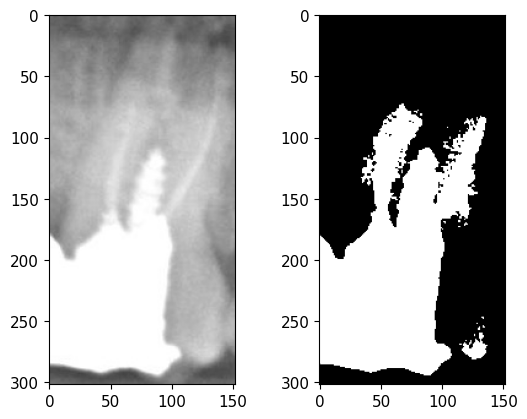

In [162]:
image = cv2.imread(f'../data/single_tooth/images/{i}.jpg')
fig, axes = plt.subplots(1, 2)
axes[0].imshow(image)
axes[1].imshow( np.where(image > 200, 255, 0) )
i += 1

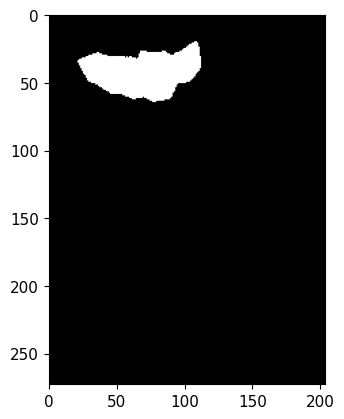

In [6]:
plt.imshow( np.where(image > 240, 255, 0) )

In [2]:
print(
    'train obj_loss = 0.023698, train box_loss = 0.021483, train cls_loss = 0.0042401\nval obj_loss = 0.16289, val box_loss = 0.03258, val cls_loss = 0.0071562'
)

train obj_loss = 0.023698, train box_loss = 0.021483, train cls_loss = 0.0042401
val obj_loss = 0.16289, val box_loss = 0.03258, val cls_loss = 0.0071562


In [148]:
np.array(range(10)).reshape(5, 2)

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7],
       [8, 9]])